In [1]:
## Lesson 3

import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np

%matplotlib inline

In [2]:
# set seed
np.seed(111)

# Function to generate test data
def CreateDataSet(Number=1):
    
    Output = []
    
    for i in range(Number):
        
        # Create a weekly (mondays) date range
        rng = pd.date_range(start='1/1/2009', end='12/31/2012', freq='W-MON')
        
        # Create random data
        data = np.randint(low=25, high=1000, size=len(rng))
        
        # Status pool
        status = [1,2,3]
        
        # Male a random list of statuses
        random_status = [status[np.randint(low=0, high=len(status))] for i in range(len(rng))]
        
        # State pool
        states = ['GA', 'FL', 'fl', 'NY', 'NJ', 'TX']
        
        # Make a random list of states
        random_states = [states[np.randint(low=0, high=len(states))] for i in range(len(rng))]
        
        Output.extend(zip(random_states, random_status, data, rng))
        
        return Output

In [3]:
dataset = CreateDataSet(4)
df = pd.DataFrame(data=dataset, columns=['State', 'Status', 'CustomerCount', 'StatusDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 208
Data columns (total 4 columns):
State            209 non-null object
Status           209 non-null int64
CustomerCount    209 non-null int64
StatusDate       209 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 8.2+ KB


In [4]:
df.head()

,State,Status,CustomerCount,StatusDate
0,GA,1,877,2009-01-05
1,FL,1,901,2009-01-12
2,fl,3,749,2009-01-19
3,FL,3,111,2009-01-26
4,GA,1,300,2009-02-02


In [5]:
# Save results to Excel
#df.to_excel('Lesson3.xlsx', index=False) # did not work
#print 'Done'

In [6]:
# Prepare Data

# 1) Make sure State columns is all in upper case
# 2) Only select records where the account status is equal to '1'
# 3) Merge NJ and NY to NY in the state column
# 4) Remove and outliers in the dataset

In [7]:
df['State'].unique()

array(['GA', 'FL', 'fl', 'TX', 'NY', 'NJ'], dtype=object)

In [8]:
# To convert the State values to upper case we will use the 
# upper() function and the dataframe's apply attribute.
# The lambda function simply will apply the upper function
# to each value in the State column

df['State'] = df.State.apply(lambda x: x.upper())

In [9]:
df['State'].unique()

array(['GA', 'FL', 'TX', 'NY', 'NJ'], dtype=object)

In [10]:
# Only grab where status == 1
mask = df['Status'] == 1
df = df[mask]

In [11]:
# Turn NJ into NY
mask = df.State == 'NJ'
df['State'][mask] = 'NY'

In [12]:
# Ignoring that warning for now, we can see we have a cleaner dataset
df['State'].unique()

array(['GA', 'FL', 'NY', 'TX'], dtype=object)

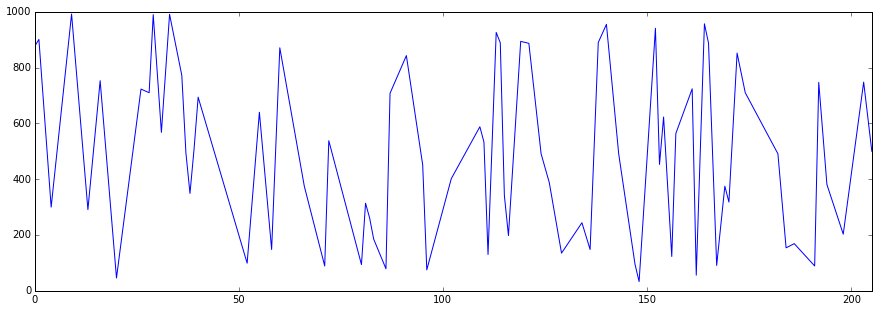

In [13]:
# Let's try to plot the data
df['CustomerCount'].plot(figsize=(15,5));

In [14]:
# ADdd values in CustomerCount column per State, StatusDAte, and 
# Status to get the Total Customer Count per day
sortdf = df[df['State']=='NY'].sort(axis=0)
sortdf.head(10)

,State,Status,CustomerCount,StatusDate
9,NY,1,992,2009-03-09
16,NY,1,753,2009-04-27
29,NY,1,990,2009-07-27
36,NY,1,772,2009-09-14
38,NY,1,349,2009-09-28
40,NY,1,694,2009-10-12
55,NY,1,640,2010-01-25
66,NY,1,375,2010-04-12
72,NY,1,538,2010-05-24
81,NY,1,314,2010-07-26


In [15]:
# Use groupby and sum() to compress data
# Also note must use reset_index to group by both State and StatusDate
# Since the groupby function expects only columns as inputs.
# The reset_index function will bring the index StatusDate back to a 
# column in the dataframe 

# Group by State and StatusDate
Daily = df.reset_index().groupby(['State', 'StatusDate']).sum()
Daily.head()

index  Status  CustomerCount
State StatusDate                              
FL    2009-01-12      1       1            901
      2009-04-06     13       1            291
      2009-07-06     26       1            723
      2009-07-20     28       1            710
      2009-08-24     33       1            991

In [16]:
# Delete status column
del Daily['Status']
Daily.head()

index  CustomerCount
State StatusDate                      
FL    2009-01-12      1            901
      2009-04-06     13            291
      2009-07-06     26            723
      2009-07-20     28            710
      2009-08-24     33            991

In [17]:
# What is the index of dataframe
Daily.index

MultiIndex(levels=[[u'FL', u'GA', u'NY', u'TX'], [2009-01-05 00:00:00, 2009-01-12 00:00:00, 2009-02-02 00:00:00, 2009-03-09 00:00:00, 2009-04-06 00:00:00, 2009-04-27 00:00:00, 2009-05-25 00:00:00, 2009-07-06 00:00:00, 2009-07-20 00:00:00, 2009-07-27 00:00:00, 2009-08-10 00:00:00, 2009-08-24 00:00:00, 2009-09-14 00:00:00, 2009-09-21 00:00:00, 2009-09-28 00:00:00, 2009-10-05 00:00:00, 2009-10-12 00:00:00, 2010-01-04 00:00:00, 2010-01-25 00:00:00, 2010-02-15 00:00:00, 2010-03-01 00:00:00, 2010-04-12 00:00:00, 2010-05-17 00:00:00, 2010-05-24 00:00:00, 2010-07-19 00:00:00, 2010-07-26 00:00:00, 2010-08-02 00:00:00, 2010-08-09 00:00:00, 2010-08-30 00:00:00, 2010-09-06 00:00:00, 2010-10-04 00:00:00, 2010-11-01 00:00:00, 2010-11-08 00:00:00, 2010-12-20 00:00:00, 2011-02-07 00:00:00, 2011-02-14 00:00:00, 2011-02-21 00:00:00, 2011-03-07 00:00:00, 2011-03-14 00:00:00, 2011-03-21 00:00:00, 2011-03-28 00:00:00, 2011-04-18 00:00:00, 2011-05-02 00:00:00, 2011-05-23 00:00:00, 2011-06-06 00:00:00, 2011-

In [18]:
# Select the State index
Daily.index.levels[0]

Index([u'FL', u'GA', u'NY', u'TX'], dtype='object', name=u'State')

In [19]:
# Select the StatusDAte index
Daily.index.levels[1]

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-02-02', '2009-03-09',
               '2009-04-06', '2009-04-27', '2009-05-25', '2009-07-06',
               '2009-07-20', '2009-07-27', '2009-08-10', '2009-08-24',
               '2009-09-14', '2009-09-21', '2009-09-28', '2009-10-05',
               '2009-10-12', '2010-01-04', '2010-01-25', '2010-02-15',
               '2010-03-01', '2010-04-12', '2010-05-17', '2010-05-24',
               '2010-07-19', '2010-07-26', '2010-08-02', '2010-08-09',
               '2010-08-30', '2010-09-06', '2010-10-04', '2010-11-01',
               '2010-11-08', '2010-12-20', '2011-02-07', '2011-02-14',
               '2011-02-21', '2011-03-07', '2011-03-14', '2011-03-21',
               '2011-03-28', '2011-04-18', '2011-05-02', '2011-05-23',
               '2011-06-06', '2011-06-27', '2011-08-01', '2011-08-15',
               '2011-08-29', '2011-09-12', '2011-10-03', '2011-10-31',
               '2011-11-07', '2011-12-05', '2011-12-12', '2011-12-19',
      

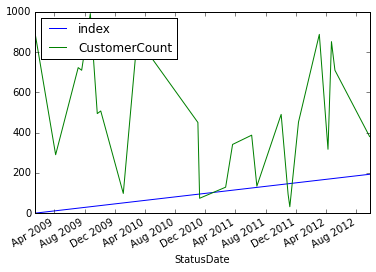

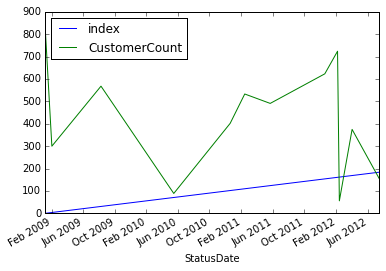

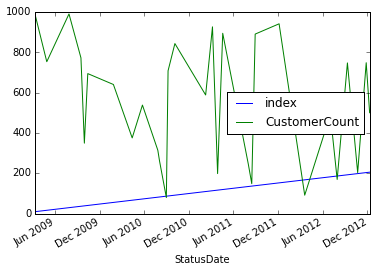

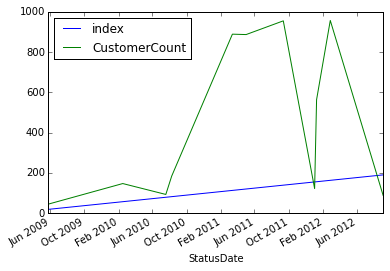

In [20]:
# Let's now plot the data per State
# As you can see by breaking up the graph by the State column
# we have a much clearer picture on how the data looks.
# Can you spot any outliers

Daily.loc['FL'].plot()
Daily.loc['GA'].plot()
Daily.loc['NY'].plot()
Daily.loc['TX'].plot();

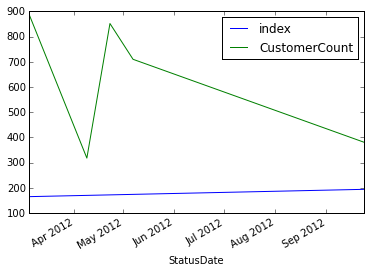

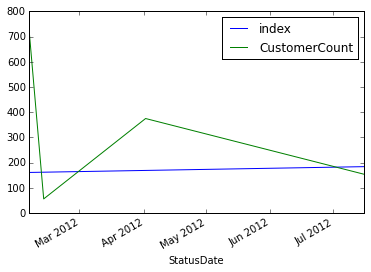

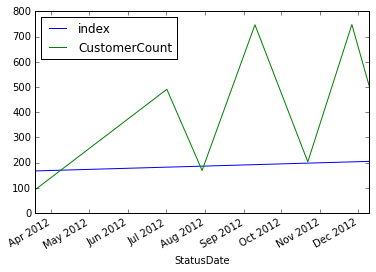

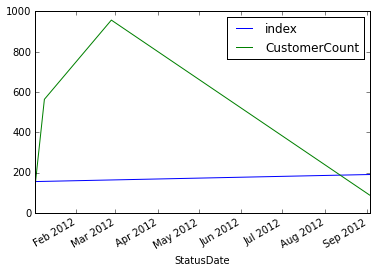

In [21]:
# We can also plot on a specfic date like 2012.

Daily.loc['FL']['2012':].plot()
Daily.loc['GA']['2012':].plot()
Daily.loc['NY']['2012':].plot()
Daily.loc['TX']['2012':].plot();

In [25]:
# Calculate Outliers

StateYearMonth = Daily.groupby([Daily.index.get_level_values(0), Daily.index.get_level_values(1).year, Daily.index.get_level_values(1).month])
Daily['Lower'] = StateYearMonth['CustomerCount'].transform(lambda x: x.quantile(q=.25) - (1.5*x.quantile(q=.75)-x.quantile(q=.25)))
Daily['Upper'] = StateYearMonth['CustomerCount'].transform(lambda x: x.quantile(q=.75) + (1.5*x.quantile(q=.75)-x.quantile(q=.25)))
Daily['Outlier'] = (Daily['CustomerCount'] < Daily['Lower']) | (Daily['CustomerCount'] > Daily['Upper'])

# Remove Outliers
Daily = Daily[Daily['Outlier'] == False]


In [26]:
Daily.head()

index  CustomerCount    Lower     Upper Outlier
State StatusDate                                                 
FL    2009-01-12      1            901  450.500  1351.500   False
      2009-04-06     13            291  145.500   436.500   False
      2009-07-06     26            723  346.875  1086.125   False
      2009-07-20     28            710  346.875  1086.125   False
      2009-08-24     33            991  495.500  1486.500   False

In [27]:
# Create a separate dataframe named ALL which groups the
# Daily dataframe by StatusDate. We are getting rid of the
# State column. The Max column represents the maximum
# Customer Count per month. The Max column is used to 
# Smooth out the graph.

# Combine all markets

# Get the max CC by date
ALL = pd.DataFrame(Daily['CustomerCount'].groupby(Daily.index.get_level_values(1)).sum())
ALL.columns = ['CustomerCount'] # rename column

# Group by Year and Month
YearMonth = ALL.groupby([lambda x: x.year, lambda x: x.month])

# What is the max customer count per Year and Month
ALL['Max'] = YearMonth['CustomerCount'].transform(lambda x: x.max())
ALL.head()

,CustomerCount,Max
StatusDate,,
2009-01-05,877,901
2009-01-12,901,901
2009-02-02,300,300
2009-03-09,992,992
2009-04-06,291,753


In [28]:
# Create the BHAG dataframe
data = [1000,2000,3000]
idx = pd.date_range(start='12/31/2011', end='12/31/2013', freq='A')
BHAG = pd.DataFrame(data, index=idx, columns=['BHAG'])
BHAG

,BHAG
2011-12-31,1000
2012-12-31,2000
2013-12-31,3000


In [29]:
# COmbining dataframes is made simple using the concat
# function. Remember choosing axis=0 appends row wise.

# Combine the CHAG and ALL data set
combined = pd.concat([ALL,BHAG], axis=0)
combined = combined.sort(axis=0)
combined.tail()

,BHAG,CustomerCount,Max
2012-10-22,NaN,203,203
2012-11-26,NaN,748,748
2012-12-10,NaN,500,500
2012-12-31,2000,NaN,NaN
2013-12-31,3000,NaN,NaN


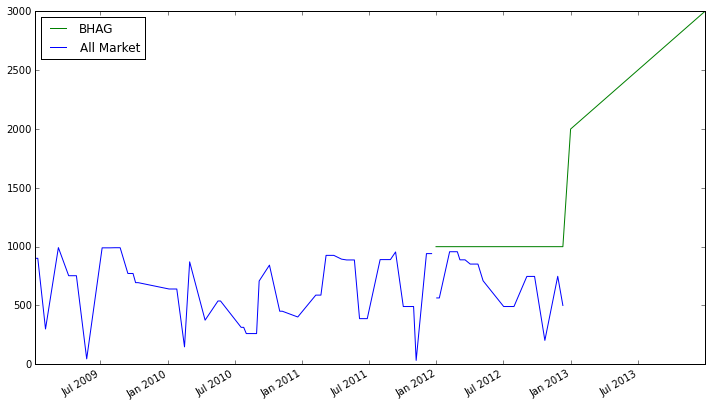

In [30]:
fig, axes = plt.subplots(figsize=(12, 7))

combined['BHAG'].fillna(method='pad').plot(color='green', label='BHAG')
combined['Max'].plot(color='blue', label='All Market')
plt.legend(loc='best');

In [31]:
# Forecast next year's customer count

# Group by Year and then get the max value per year
Year = combined.groupby(lambda x: x.year).max()
Year

,BHAG,CustomerCount,Max
2009,NaN,992,992
2010,NaN,871,871
2011,1000,955,955
2012,2000,957,957
2013,3000,NaN,NaN


In [32]:
# Add a column representing the percent change per year
Year['YR_PCT_Change'] = Year['Max'].pct_change(periods=1)
Year

,BHAG,CustomerCount,Max,YR_PCT_Change
2009,NaN,992,992,NaN
2010,NaN,871,871,-0.121976
2011,1000,955,955,0.096441
2012,2000,957,957,0.002094
2013,3000,NaN,NaN,NaN


In [33]:
# Increase this year's customer count by assuming
# Current growth rate

(1 + Year.ix[2012, 'YR_PCT_Change']) * Year.ix[2012,'Max']

959.00418848167533

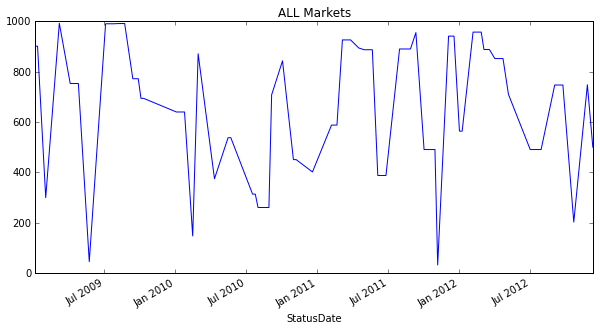

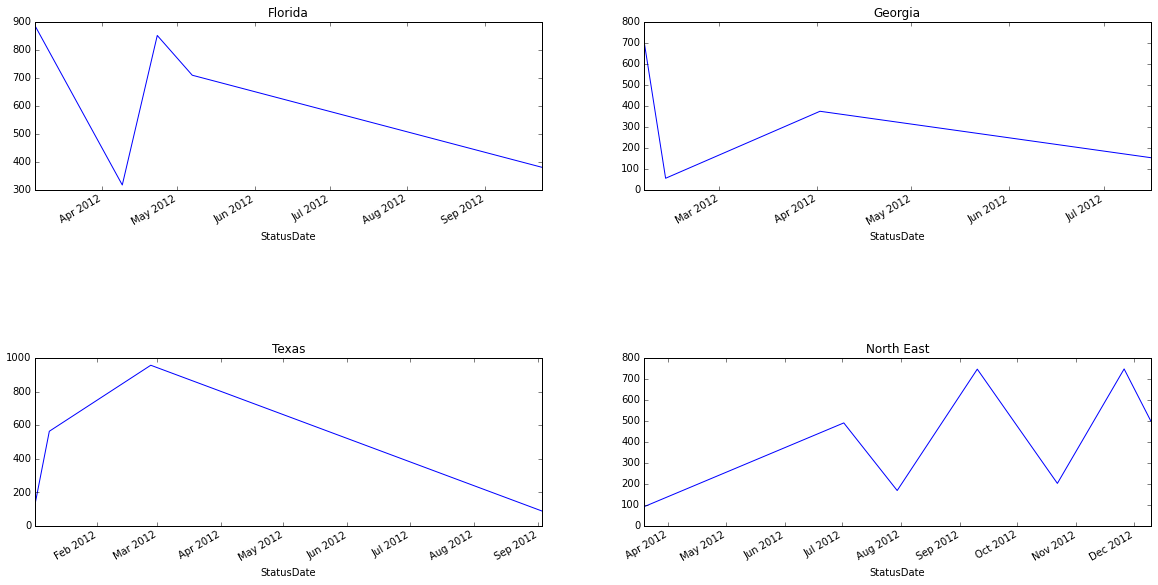

In [34]:
## Present Data

# First Graph
ALL['Max'].plot(figsize=(10, 5));plt.title('ALL Markets')

# Last four Graphs
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.subplots_adjust(hspace=1.0) ## Create space between plots

Daily.loc['FL']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[0,0])
Daily.loc['GA']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[0,1]) 
Daily.loc['TX']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[1,0]) 
Daily.loc['NY']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[1,1]) 

# Add titles
axes[0,0].set_title('Florida')
axes[0,1].set_title('Georgia')
axes[1,0].set_title('Texas')
axes[1,1].set_title('North East');